In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading datasets
train = pd.read_csv("Loan Prediction - Train File.csv")
test = pd.read_csv("Loan Prediction - Test File.csv")

# making copy of dataset as a precaution
train_original = train.copy()
test_original = test.copy()

In [4]:
# checking the features
train.columns
# loan status is the target variable the remaining variables are the 12 independent variables.

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
#univariate analysis
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
# normalizing to print proportions
train['Loan_Status'].value_counts(normalize=True)
# from here 69% of the people were approved

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

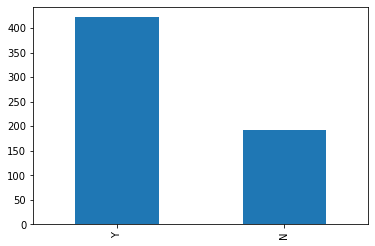

In [11]:
train['Loan_Status'].value_counts().plot.bar()

In [12]:
# visualizing each variable separately

Independent Variable

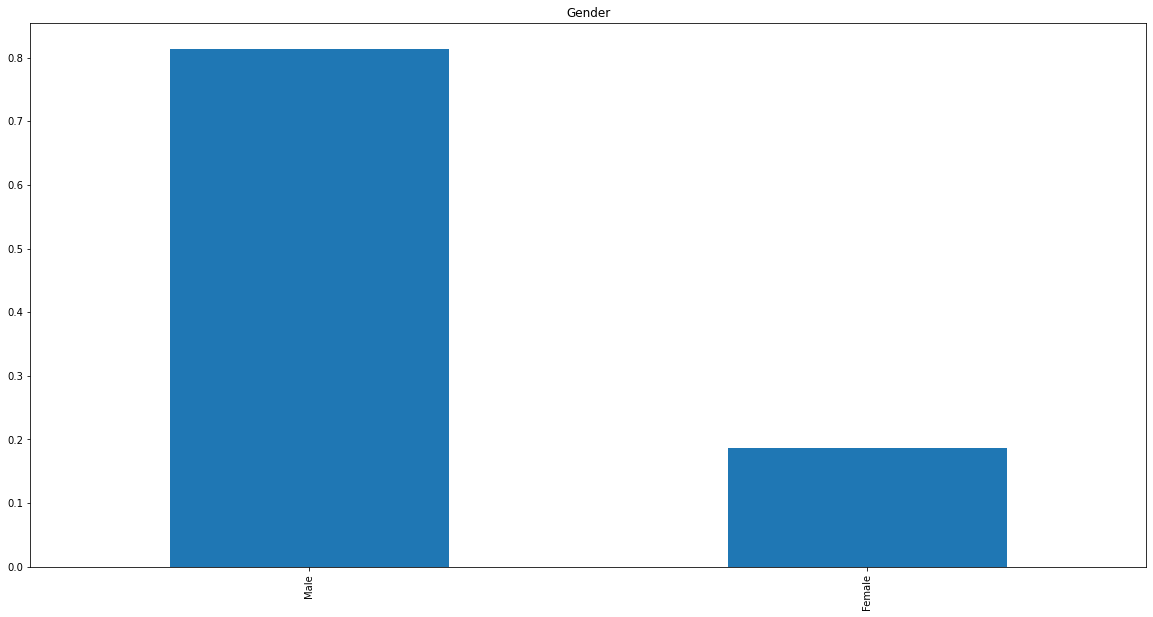

In [13]:
#plt.figure(1) plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()

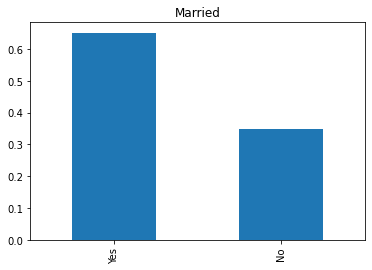

In [14]:
#plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()

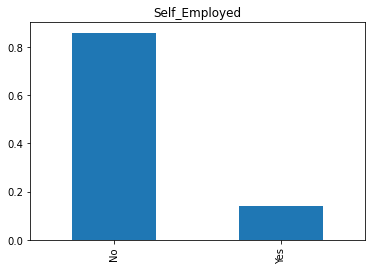

In [15]:
#plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()

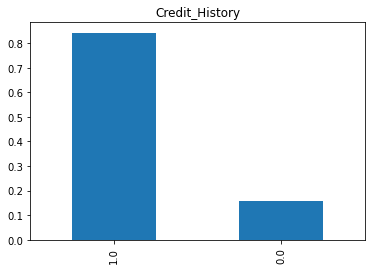

In [16]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()
# 80% applicants are male, 65% are married, 15% are self employed, 85% have repaid their debts.

Independent Variable (Ordinal)

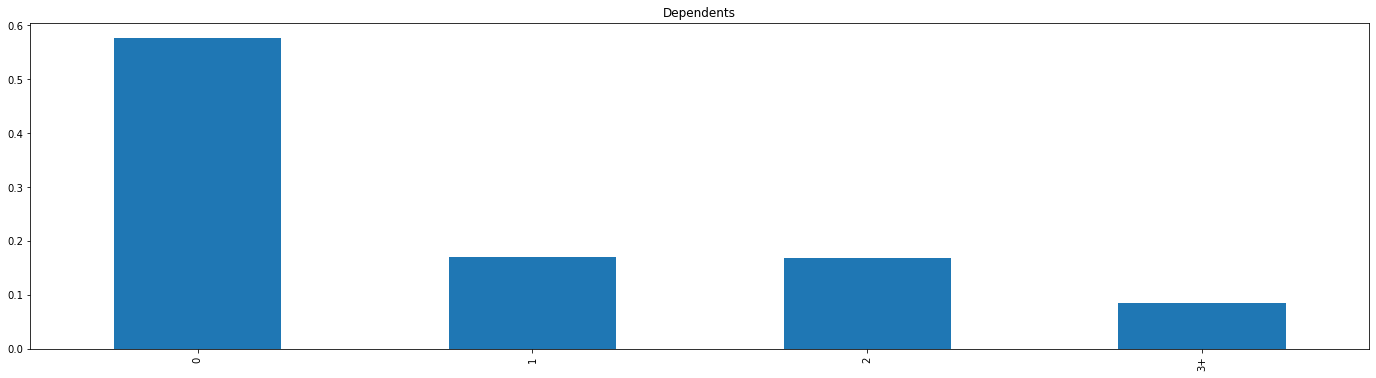

In [17]:
# plt.figure(1) plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()

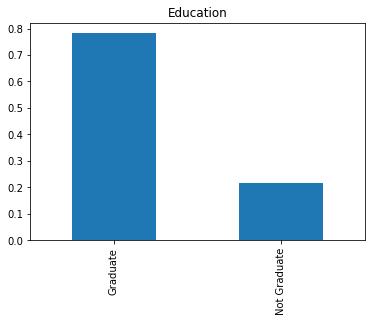

In [18]:
# plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()

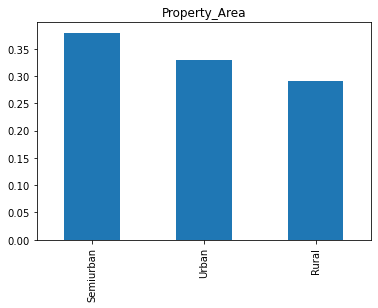

In [19]:
# plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()
# from the independent variables; most of the applicants have no dependents, 80% of the aaplicants are graduate, most of them are from semiUrban.

Independent Variable (Numerical)

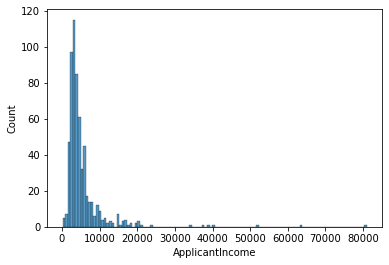

In [20]:
# plt.figure(1) plt.subplot(121) use displot or histplot, they don't show like distplot
sns.histplot(train['ApplicantIncome']) # how do I make the ylabel density
plt.show()

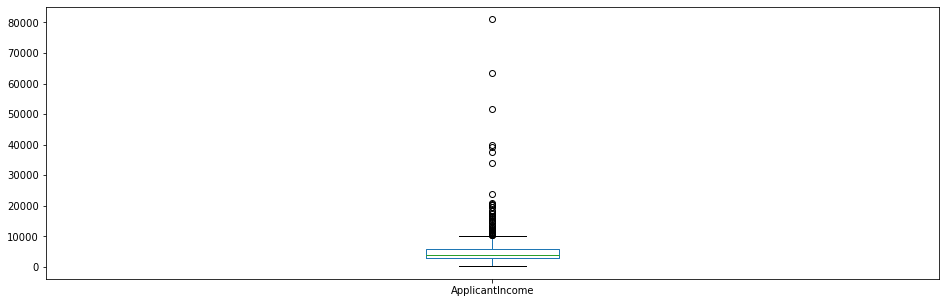

In [21]:
#plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()
# it can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.
# we will try to make it normal in later sections as algorithms works better if the data is normally distributed.
# the boxplot confirms the presence of a lot of outliers/extreme values. this can be attributed tot he income disparity in the society.
# part of this can be driven by the fact that we are looking at people with different education levels.

Text(0.5, 0.98, '')

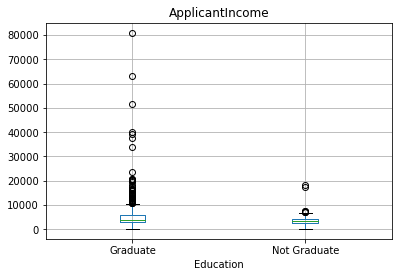

In [22]:
train.boxplot(column='ApplicantIncome', by ='Education')
plt.suptitle("")
# from here higher number of grduates with very high incomes appears to be outliers.

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

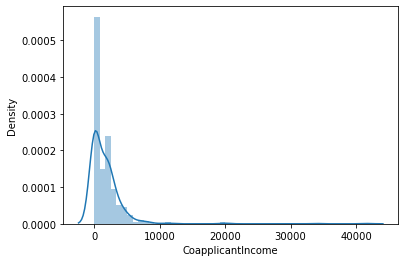

In [23]:
#plt.figure(1) plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

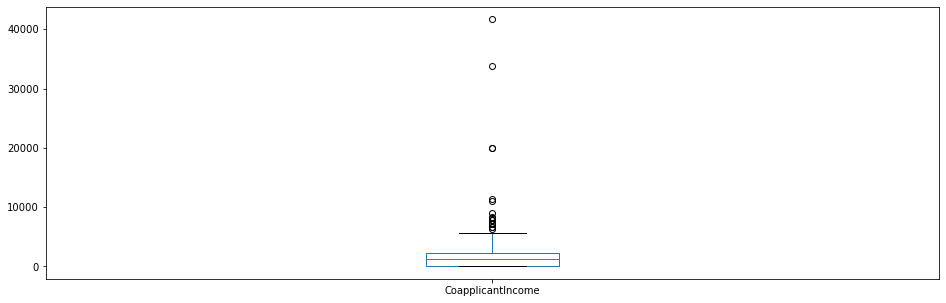

In [24]:
# plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()
# the coapplicant's income also have outliers

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

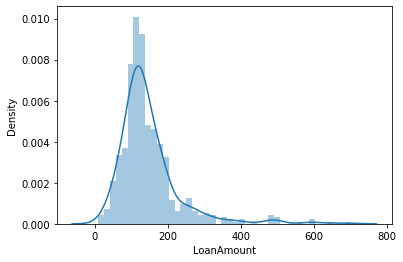

In [25]:
# plt.figure(1) plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount'])

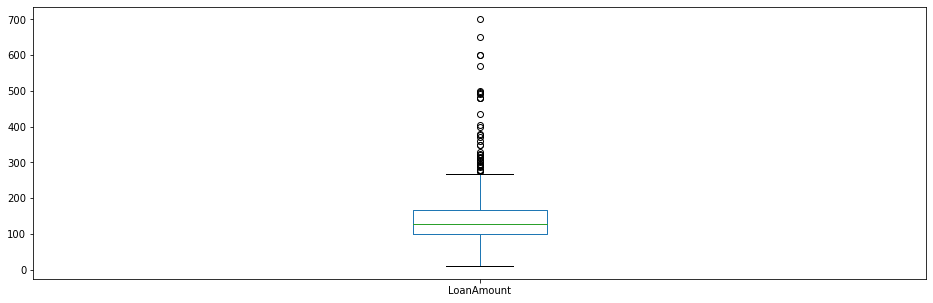

In [26]:
# plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

to see how each feature correlates with LoanAmount -- bivariate analysis
some hypotheses generated-- Applicant with high income should have more chances of loan approval
those who have repaid their previous debts should have higher chances of loan approval
loan approval should depend on the loan amount. the lesser the loan amount, the higher the chances of loan approval
lesser the amount to be paid monthly to repay the loan, the higher the chances of approval

Categorical Independent variable vs Target Variable

<AxesSubplot:xlabel='Gender'>

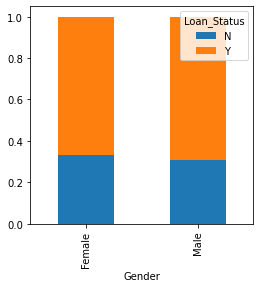

In [27]:
Gender=pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

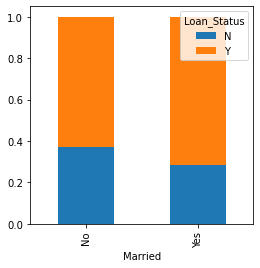

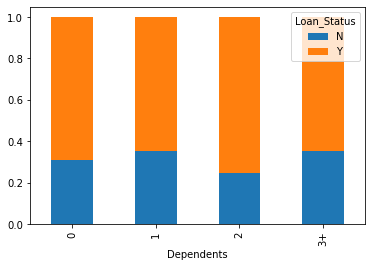

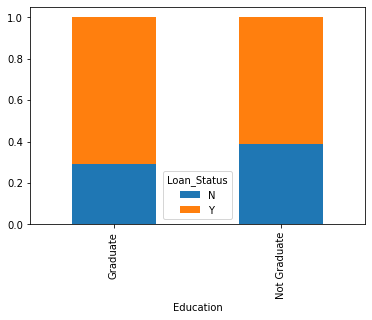

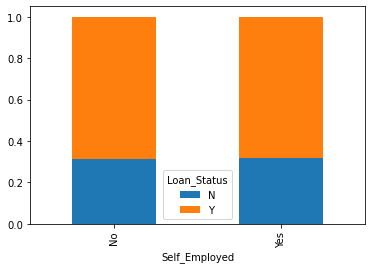

In [28]:
Married=pd.crosstab(train['Married'], train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Education=pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
# proportion of married applicants is higher for the approved loans
# distribution of applicants with 1 or 3+ dependents is similar across both the categories of LOan_Status
# There is nothing significant we can infer from self_employed vs loan_status plot

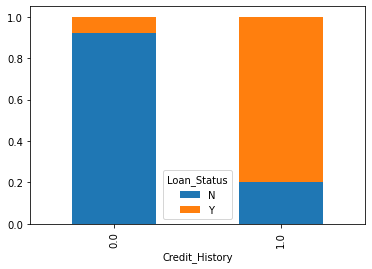

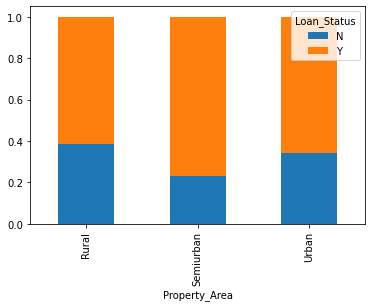

In [29]:
Credit_History=pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
# it seems people with credit history as 1 are more likely to get their loans approved
#proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas

Numerical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

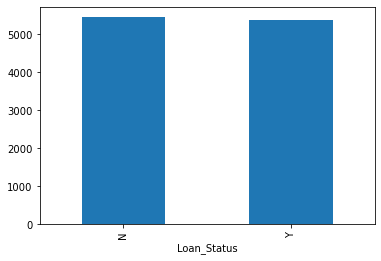

In [30]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
# there's no change in the mean

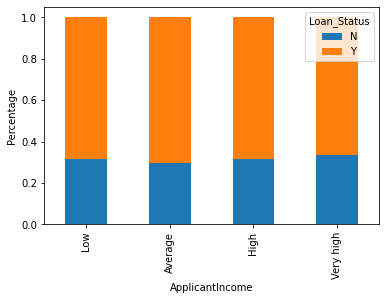

In [31]:
# bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin
bins=[0,2500,4000,6000,81000]; group=['Low', 'Average', 'High', 'Very high'];
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True), plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

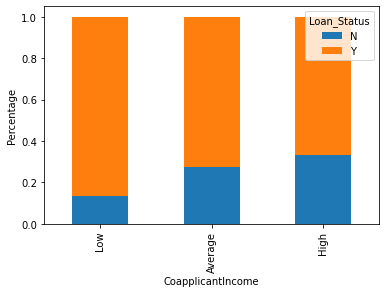

In [32]:
# analyzing coapplicant income and loan amount
bins=[0,1000,3000,42000]; group=['Low', 'Average', 'High'];
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True), plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')
#this graph shows theres no relationship between the coapplicant's income and loan approval

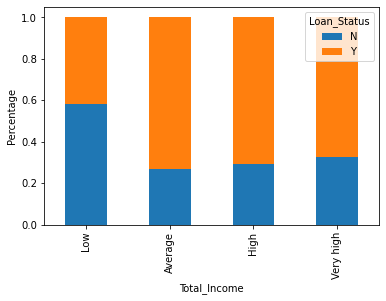

In [33]:
# combination of the applicantIncome and coapplicant income to see the effect of total income on the loan status
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]; group=['Low', 'Average', 'High', 'Very high'];
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True), plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')
# from this graph, the proportion of loans getting approved for applicants having low total income is very less compared tothat of applicants with average, high, and very high income

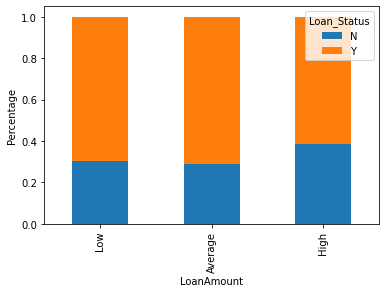

In [34]:
# visualizing loan amount variable
bins=[0,100,200,700]; group=['Low', 'Average', 'High'];
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True), plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')
# from this graph, it can be seen that the loan approval chances are higher for low and average loan amount when compared with high loan amount

Dropping bins created for the exploration part, changing the 3+ independents variable to 3 to make it numerical variables. Converting the target variable categories into 0 and 1 so that it's correlation with numerical variables can br found. Logistic regression takes only numeric values as input. N will be replaced with 0 and Y with 1.

In [35]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

<AxesSubplot:>

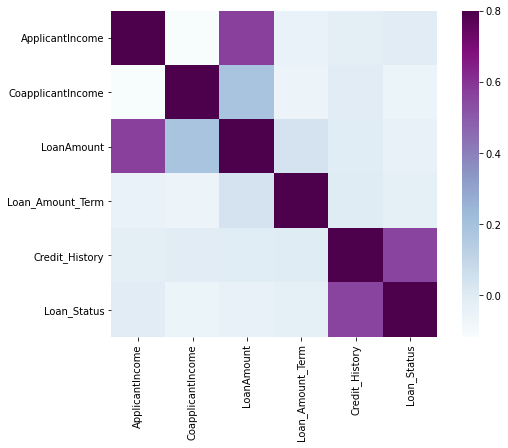

In [38]:
# looking at correlation between all the numerical variables with heat map. The variables with darker color have more correlation.
matrix = train.corr(); f, ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
# from the heatmap, the most correlated are applicanincome-loanamount, credithistory-loanstatus and loanamount with coapplicantincome.

In [39]:
#listing out feature-wise count of missing values
train.isnull().sum()
# check for test also.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
# filling out the missing values using mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [41]:
# filling out the missing values in loanamountterm.
#looking at the value count of loanamountterm variable
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [47]:
# replacing the missing values with the mode of loanamountterm
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [48]:
# the missing values in loanamount will be filled with median values as it was earlier noticed that it has outliers.
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [49]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
# filling up missing test variables.
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Outlier Treatment

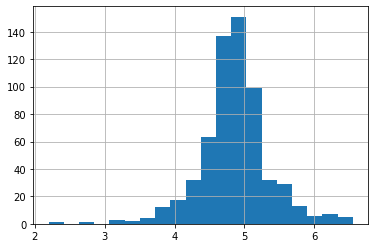

In [52]:
# one way of treating outliers is by using log transformation to remove skewness(loanamount has right skewness). log transformation reduces larger variables
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Using Logistic regression model and prediction making evaluation metrics for Classification problems

In [58]:
# dropping Loan_ID, as it doesn't have any effect on the loan status
#train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [67]:
# for sklearn
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [68]:
# making dummy variables for the categorical variables
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
# train still has loan_status(the target variable)

In [69]:
# splitting train dataset to validate predictions
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=0.3)

In [85]:
# Logistic Regression and accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#model = LogisticRegression(max_iter=150)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [84]:
# train predictions
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)
#0.827027027027027

0.827027027027027

In [86]:
# test predictions
pred_test = model.predict(test)

In [87]:
submission = pd.read_csv('Loan Prediction - Sample Submission.csv')
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
# converting 1 and 0 to Y and N
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
#converting the submission to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [89]:
# stratified k-fold cross validation
from sklearn.model_selection import StratifiedKFold
# cross validation logistic model with stratified 5 folds.
i=1 
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'. format(i, kf.n_splits))
    xtr,xvl= X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold5


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.8048780487804879

2 of kfold5


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.8373983739837398

3 of kfold5
accuracy_score 0.7804878048780488

4 of kfold5
accuracy_score 0.7886178861788617

5 of kfold5
accuracy_score 0.7950819672131147


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


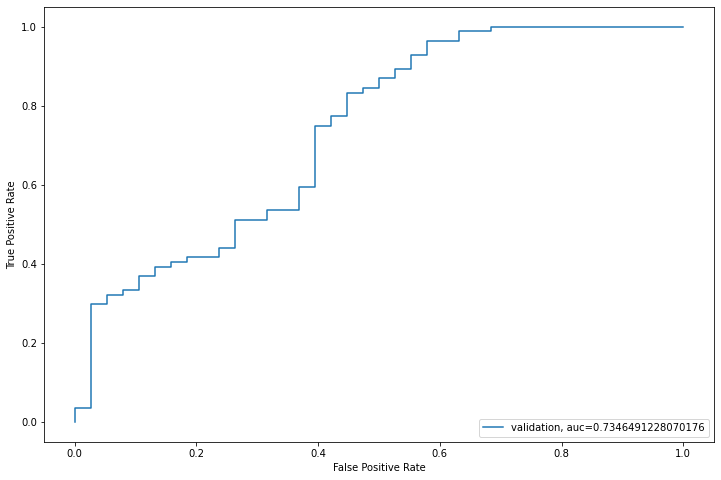

In [91]:
from sklearn import metrics 
fpr, tpr, _=metrics.roc_curve(yvl, pred)
auc=metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [92]:
# submitting
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

# replacing Y and N
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

#converting to csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic.csv')

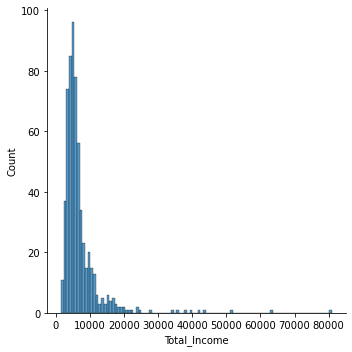

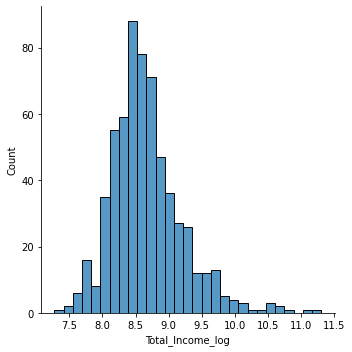

In [108]:
# feature engineering -- coming up with features that might affect the target variable
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

# checking the distribution of total income displot/histplot/kdeplot
sns.displot(train['Total_Income'])

#kdeplot() (with kind="kde") or ecdfplot() (with kind="ecdf"; univariate-only)
#log transformation because it's right skewed

train['Total_Income_log']= np.log(train['Total_Income'])
sns.displot(train['Total_Income_log'])
test['Total_Income_log']= np.log(test['Total_Income'])

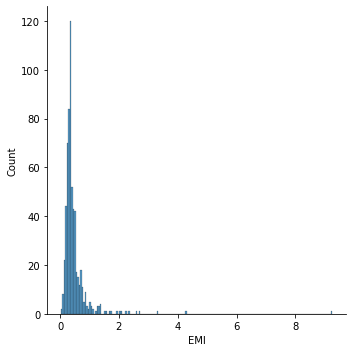

In [109]:
# creating EMI feature
train['EMI']= train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']= test['LoanAmount']/test['Loan_Amount_Term']
sns.displot(train['EMI'])

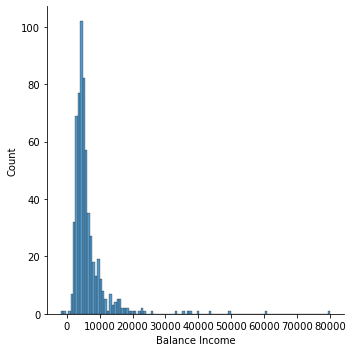

In [110]:
# creating balance income feature
train['Balance Income']= train['Total_Income']-(train['EMI']*1000)
#multiply with 1000 to make the units equal
test['Balance Income']= test['Total_Income']-(test['EMI']*1000)
sns.displot(train['Balance Income'])

In [111]:
# dropping the variables used to create the new variables
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [112]:
#model building
X = train.drop('Loan_Status', 1)
y = train.Loan_Status # save target variable in separate dataset

In [113]:
i=1 
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'. format(i, kf.n_splits))
    xtr,xvl= X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl, pred_test)
    print('accuracy_score3', score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score3 0.7886178861788617

2 of kfold5
accuracy_score3 0.6910569105691057

3 of kfold5
accuracy_score3 0.6666666666666666

4 of kfold5
accuracy_score3 0.7804878048780488

5 of kfold5
accuracy_score3 0.680327868852459


In [114]:
# submitting
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

# replacing Y and N
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

#converting to csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Log2.csv')
# feature engineering didn't improve the model

In [115]:
# decision tree
from sklearn import tree

i=1 
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'. format(i, kf.n_splits))
    xtr,xvl= X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl, pred_test)
    print('Decision Tree accuracy_score: ', score)
    i+=1
    pred_test=model.predict(test)


1 of kfold5
Decision Tree accuracy_score:  0.7398373983739838

2 of kfold5
Decision Tree accuracy_score:  0.6991869918699187

3 of kfold5
Decision Tree accuracy_score:  0.7560975609756098

4 of kfold5
Decision Tree accuracy_score:  0.7073170731707317

5 of kfold5
Decision Tree accuracy_score:  0.6721311475409836


In [116]:
# submitting
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

# replacing Y and N
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

#converting to csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Decision_Tree.csv')

from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.datasets import make_classification
>>> X, y = make_classification(n_samples=1000, n_features=4,
...                            n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)
>>> clf = RandomForestClassifier(max_depth=2, random_state=0)
>>> clf.fit(X, y)
RandomForestClassifier(...)
>>> print(clf.predict([[0, 0, 0, 0]]))
[1]

In [118]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

i=1 

kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'. format(i, kf.n_splits))
    xtr,xvl= X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl, pred_test)
    print('Random Forest accuracy_score:', score)
    i+=1
    
    pred_test=model.predict(test)


1 of kfold5
Random Forest accuracy_score: 0.8292682926829268

2 of kfold5
Random Forest accuracy_score: 0.8130081300813008

3 of kfold5
Random Forest accuracy_score: 0.7723577235772358

4 of kfold5
Random Forest accuracy_score: 0.8048780487804879

5 of kfold5
Random Forest accuracy_score: 0.7540983606557377


In [121]:
# improving the accuracy for random forest by tuning the hyperparameters
# this will be done by using grid search -- a way of selecting the best family of hyperparameters, parametrized by a grid of parameters.
from sklearn.model_selection import GridSearchCV

# provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)

#fit the grid search model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise', estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False), iid=True, n_jobs=1, param_grid={'max_depth':[1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]}, pre_dispatch='2*n_jobs', refit=True, return_train_score='warn', scoring=None, verbose=0)

# estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=3, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False)

RandomForestClassifier(max_depth=3, n_estimators=41, n_jobs=1, random_state=1)

In [122]:
i=1 

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'. format(i, kf.n_splits))
    xtr,xvl= X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl, pred_test)
    print('Random Forest_hypertuned accuracy_score:', score)
    i+=1
    
    pred_test=model.predict(test)
    pred2 = model.predict_proba(test)[:,1]


1 of kfold5
Random Forest_hypertuned accuracy_score: 0.8130081300813008

2 of kfold5
Random Forest_hypertuned accuracy_score: 0.8455284552845529

3 of kfold5
Random Forest_hypertuned accuracy_score: 0.8048780487804879

4 of kfold5
Random Forest_hypertuned accuracy_score: 0.7967479674796748

5 of kfold5
Random Forest_hypertuned accuracy_score: 0.7786885245901639


In [123]:
# submitting
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

# replacing Y and N
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

#converting to csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Random Forest.csv')

<AxesSubplot:>

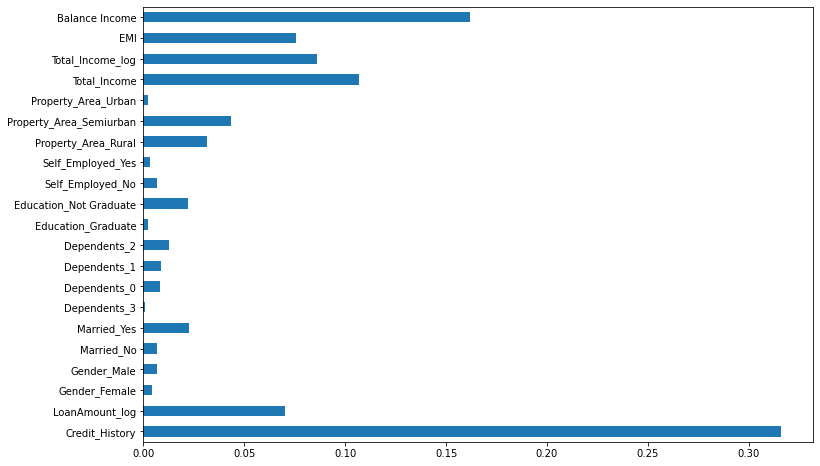

In [124]:
# finding feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

In [127]:
#xgboost
from xgboost import XGBClassifier

i=1 

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'. format(i, kf.n_splits))
    xtr,xvl= X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = XGBClassifier(max_depth=4, n_estimators=50)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl, pred_test)
    print('XGboost accuracy_score:', score)
    i+=1


1 of kfold5
[12:17:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGboost accuracy_score: 0.7804878048780488

2 of kfold5
[12:17:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost accuracy_score: 0.7886178861788617

3 of kfold5
[12:17:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost accuracy_score: 0.7642276422764228

4 of kfold5
[12:17:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost accuracy_score: 0.7804878048780488

5 of kfold5
[12:17:22] WARNING: 

In [130]:
# submitting
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

# replacing Y and N
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

#converting to csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('XGBoost.csv')

In [131]:
# SVM
from sklearn import svm

i=1 
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'. format(i, kf.n_splits))
    xtr,xvl= X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = svm.SVC()
    model.fit(xtr,ytr)
    pred_test5 = model.predict(xvl)
    score=accuracy_score(yvl, pred_test5)
    print('SVM accuracy_score: ', score)
    i+=1
    pred_test5=model.predict(test)
    
#The average score for svm is quite low.


1 of kfold5
SVM accuracy_score:  0.6910569105691057

2 of kfold5
SVM accuracy_score:  0.6910569105691057

3 of kfold5
SVM accuracy_score:  0.6829268292682927

4 of kfold5
SVM accuracy_score:  0.6829268292682927

5 of kfold5
SVM accuracy_score:  0.6721311475409836


In [132]:
# submitting
submission['Loan_Status']=pred_test5
submission['Loan_ID']=test_original['Loan_ID']

# replacing Y and N
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

#converting to csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('svm.csv')

In [133]:
# naive bayes
from sklearn.naive_bayes import GaussianNB


i=1 
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold{}'. format(i, kf.n_splits))
    xtr,xvl= X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = GaussianNB()
    model.fit(xtr,ytr)
    pred_test6 = model.predict(xvl)
    score=accuracy_score(yvl, pred_test6)
    print('GaussianNB accuracy_score: ', score)
    i+=1
    pred_test6=model.predict(test)
    
#The average score for gaussianNB is higher than svm.


1 of kfold5
GaussianNB accuracy_score:  0.8211382113821138

2 of kfold5
GaussianNB accuracy_score:  0.8211382113821138

3 of kfold5
GaussianNB accuracy_score:  0.7560975609756098

4 of kfold5
GaussianNB accuracy_score:  0.7398373983739838

5 of kfold5
GaussianNB accuracy_score:  0.7868852459016393


In [134]:
# submitting
submission['Loan_Status']=pred_test6
submission['Loan_ID']=test_original['Loan_ID']

# replacing Y and N
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

#converting to csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('GaussianNB.csv')